In [1]:
import scipy.io
import pandas as pd
import numpy as np
import sympy as sp
import torch

TheSauce = scipy.io.loadmat('H_and_psi_sinesoids.mat')

H_01 = np.array(TheSauce['H_01_pi'])
H_05 = np.array(TheSauce['H_05_pi'])
H_09 = np.array(TheSauce['H_09_pi'])

P_01 = np.array(TheSauce['psi_01_pi'])
P_05 = np.array(TheSauce['psi_05_pi'])
P_09 = np.array(TheSauce['psi_09_pi'])


In [2]:

TEST = np.matrix(H_09)

if np.all(TEST == TEST.conj().T):
    print("Hermitian!")

%timeit evalues, evector = np.linalg.eigh(TEST)


Hermitian!
490 μs ± 18.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
import scipy.linalg

RESOLUTION = 500

t = np.linspace(0,6.28,RESOLUTION)

psi_evo = np.array(([scipy.linalg.expm(t * 1j * H_01) @ P_01 for t in t])).reshape(64,RESOLUTION)
    

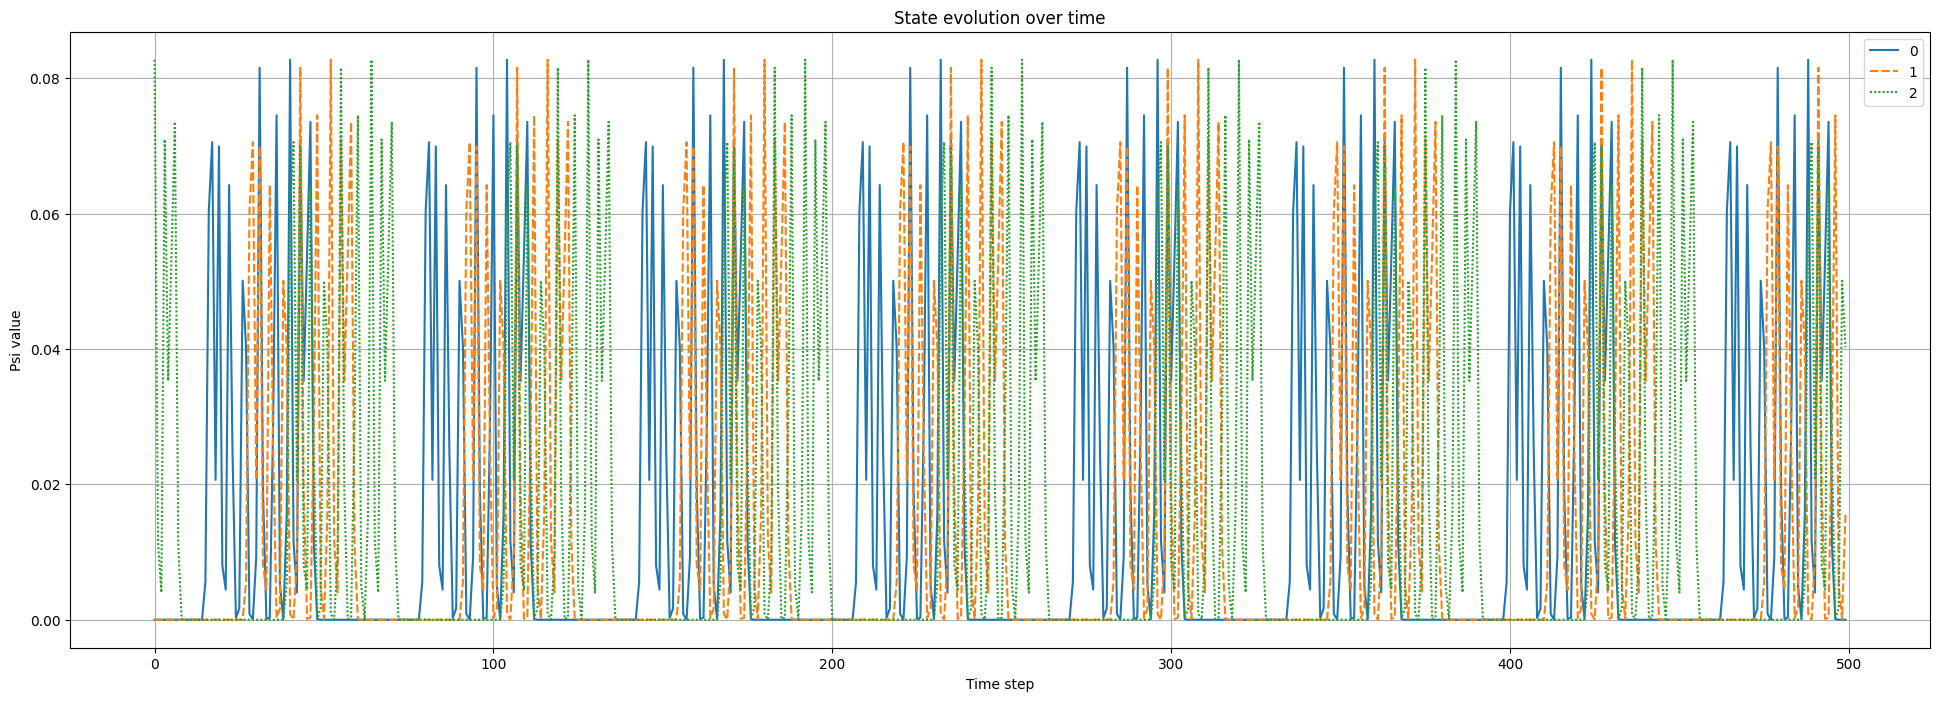

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def prob(Z):
    return np.real(Z) ** 2 + np.imag(Z)**2

vector_func = np.vectorize(prob)
psi_evo_prob = vector_func(psi_evo)


plt.figure(figsize=(24, 8)) 
sns.lineplot(data=psi_evo_prob.T[:, :3])
plt.grid()
plt.xlabel("Time step")
plt.ylabel("Psi value")
plt.title("State evolution over time")
plt.show()
